### Data Summary
 - CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

### Project
- You project will be to use the data set to accutately classify each image
- Keep in mind these are color images so adjust your dimensions accordingly
- Images are represented in the data frame below

In [56]:
image_dict = ["Plane","Automibile","Bird","Cat","Deer","Dog","Frog","Horse","Boat","Truck"]

In [61]:
images_Data_IDS = pd.DataFrame(image_dict, columns=["Image Category"])

In [62]:
images_Data_IDS

,Image Category
0,Plane
1,Automibile
2,Bird
3,Cat
4,Deer
5,Dog
6,Frog
7,Horse
8,Boat
9,Truck


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 17s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

## Single Image
- Lets take a look at a single image

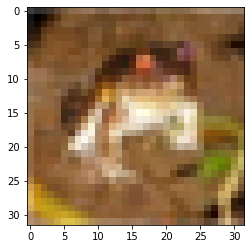

In [11]:
plt.imshow(x_train[0])

### Normalizing the images 

In [12]:
x_train = x_train/255

In [13]:
x_test = x_test/255

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Y labels 
- WE can see that the y labels are read in as integers
- What we would want is to have these read in as Categorical values
- We will use TensorFLow toCatrgorical Utility to do so

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test = to_categorical(y_test)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_test.shape

(10000, 10)

### Building Model
- We will use Early Stopping to prevent overfitting, which also allows us to stretch the epochs
- WE will need to chenge th einput shape since this is a color image
- Whe nwe are daling with more complex images we should add in more convoluntional layers 
- our images demensions is now 32x32x3 


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), input_shape = (32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), input_shape = (32,32,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 250, activation = "relu"))
model.add(Dense(units = 10 , activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               200250    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

## Early Stopping
- Setting up our early stopping parameters 

In [26]:
stop = EarlyStopping(monitor= "val_loss", mode="min", patience=3)

In [29]:
model.fit(x_train,y_cat_train, validation_data=(x_test,y_cat_test), epochs=20, callbacks=[stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 37s 740us/sample - loss: 1.5032 - accuracy: 0.4563 - val_loss: 1.2414 - val_accuracy: 0.5559
Epoch 2/20
50000/50000 [==============================] - 36s 724us/sample - loss: 1.1860 - accuracy: 0.5820 - val_loss: 1.1433 - val_accuracy: 0.5921
Epoch 3/20
50000/50000 [==============================] - 36s 721us/sample - loss: 1.0368 - accuracy: 0.6353 - val_loss: 1.0790 - val_accuracy: 0.6198
Epoch 4/20
50000/50000 [==============================] - 36s 718us/sample - loss: 0.9303 - accuracy: 0.6744 - val_loss: 0.9940 - val_accuracy: 0.6529
Epoch 5/20
50000/50000 [==============================] - 36s 719us/sample - loss: 0.8466 - accuracy: 0.7056 - val_loss: 1.0015 - val_accuracy: 0.6576
Epoch 6/20
50000/50000 [==============================] - 36s 719us/sample - loss: 0.7656 - accuracy: 0.7324 - val_loss: 0.9827 - val_accuracy: 0.6640
Epoch 7/20
50000/50000 [====================

## Model Performance
- Testing the model performance
- Looks like we get a 81% accuracy on our training data dn 65% on our validation data

In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.503235,0.45626,1.241433,0.5559
1,1.185973,0.58198,1.143315,0.5921
2,1.036772,0.63528,1.079001,0.6198
3,0.930298,0.67438,0.993975,0.6529
4,0.846619,0.70564,1.001456,0.6576
5,0.765634,0.73238,0.982709,0.6640
6,0.693950,0.75658,0.974210,0.6792
7,0.632930,0.77868,0.995524,0.6713
8,0.575613,0.79734,1.057041,0.6677
9,0.518923,0.81746,1.138577,0.6557


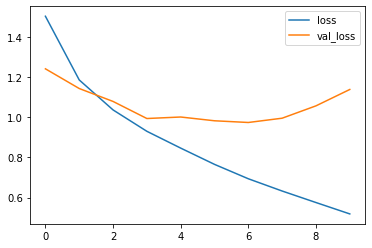

In [34]:
metrics[["loss", "val_loss"]].plot()

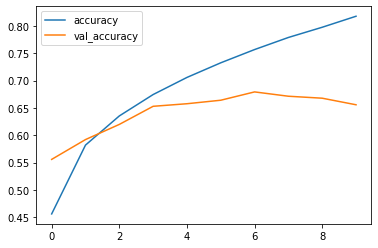

In [36]:
metrics[["accuracy", "val_accuracy"]].plot()

## Predictions
- Lets see how our model will predict on our test Data

In [37]:
predictions = model.predict_classes(x_test)

### Classificaiton Matrix
- Lets see how well our model classified the images 
- appears that out model is struggling more to predict image 3

In [38]:
from sklearn.metrics import classification_report,confusion_matrix, explained_variance_score

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.55      0.65      1000
           1       0.89      0.67      0.76      1000
           2       0.57      0.55      0.56      1000
           3       0.43      0.52      0.47      1000
           4       0.54      0.67      0.60      1000
           5       0.55      0.57      0.56      1000
           6       0.66      0.83      0.74      1000
           7       0.76      0.69      0.72      1000
           8       0.80      0.76      0.78      1000
           9       0.74      0.74      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



### Predicting Random Images 

In [125]:
from random import randint
random_index = randint(1, len(x_test))

In [126]:
random_index

8762

In [127]:
new_image = x_train[random_index]

## Model Predicts The animal below

In [128]:
model.predict_classes(new_image.reshape(1,32,32,3))

array([9])

In [129]:
images_Data_IDS

,Image Category
0,Plane
1,Automibile
2,Bird
3,Cat
4,Deer
5,Dog
6,Frog
7,Horse
8,Boat
9,Truck


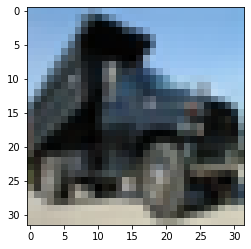

In [130]:
plt.imshow(x_train[random_index]);

In [131]:
model.save("Cifar-10.h5")